In [1]:
import pandas as pd
import numpy as np

In [3]:
dietDF = pd.read_csv("sampleFromQiitaDownload.txt",sep='\t',low_memory=False)

In [3]:
dietDF

sample_name     acid_reflux acne_medication  \
0              10317.000001000    Not provided           false   
1              10317.000001001    Not provided           false   
2              10317.000001002    Not provided           false   
3              10317.000001004    Not provided           false   
4              10317.000001008    Not provided           false   
5              10317.000001011    Not provided           false   
6              10317.000001018    Not provided           false   
7              10317.000001020    Not provided           false   
8              10317.000001022    Not provided           false   
9              10317.000001025    Not provided           false   
10             10317.000001026    Not provided           false   
11             10317.000001028    Not provided           false   
12             10317.000001030    Not provided           false   
13             10317.000001031    Not provided           false   
14             10317.000001032    Not provided           false   
15             10317.000001038    Not provided           false   
16             10317.000001040    Not provided           false   
17             10317.000001041    Not provided           false   
18             10317.000001042    Not provided           false   
19             10317.000001044    Not provided           false   
20             10317.000001046    Not provided           false   
21             10317.000001047    Not provided           false   
22             10317.000001048    Not provided           false   
23             10317.000001049    Not provided           false   
24             10317.000001056    Not provided           false   
25             10317.000001058    Not provided           false   
26             10317.000001059    Not provided           false   
27             10317.000001060    Not provided           false   
28             10317.000001061    Not provided           false   
29             10317.000001062    Not provided           false   
...                        ...             ...             ...   
25800      10317.Blank27.H3.r5  Not applicable  Not applicable   
25801      10317.Blank28.A4.r6  Not applicable  Not applicable   
25802      10317.Blank28.B4.r6  Not applicable  Not applicable   
25803      10317.Blank28.C4.r6  Not applicable  Not applicable   
25804      10317.Blank28.D4.r6  Not applicable  Not applicable   
25805      10317.Blank28.E4.r6  Not applicable  Not applicable   
25806      10317.Blank28.F4.r6  Not applicable  Not applicable   
25807      10317.Blank28.G4.r6  Not applicable  Not applicable   
25808      10317.Blank28.H2.r6  Not applicable  Not applicable   
25809      10317.Blank28.H4.r6  Not applicable  Not applicable   
25810      10317.Blank33.A9.r6  Not applicable  Not applicable   
25811      10317.Blank33.B9.r6  Not applicable  Not applicable   
25812      10317.Blank33.C9.r6  Not applicable  Not applicable   
25813     10317.Blank33.D12.r6  Not applicable  Not applicable   
25814      10317.Blank33.D9.r6  Not applicable  Not applicable   
25815     10317.Blank33.E12.r6  Not applicable  Not applicable   
25816      10317.Blank33.E9.r6  Not applicable  Not applicable   
25817     10317.Blank33.F12.r6  Not applicable  Not applicable   
25818      10317.Blank33.F9.r6  Not applicable  Not applicable   
25819     10317.Blank33.G12.r6  Not applicable  Not applicable   
25820      10317.Blank33.G9.r6  Not applicable  Not applicable   
25821     10317.Blank33.H12.r6  Not applicable  Not applicable   
25822      10317.Blank33.H9.r6  Not applicable  Not applicable   
25823       10317.Blank8.H8.r2  Not applicable  Not applicable   
25824          10317.blank.r12  Not applicable  Not applicable   
25825  10317.blank1.ragOffice1  Not applicable  Not applicable   
25826  10317.blank2.ragOffice1  Not applicable  Not applicable   
25827      10317.blank20.G2.r4  Not applicable  Not applicable   
25828  10317.blank3.ragOffice1  Not applicable  Not applica

In [28]:
#First we want all humans
#host_common_name = "human"
print("old shape: ", dietDF.shape)
dietDF=dietDF.loc[dietDF['host_common_name'] == "human"]
dietDF.shape

old shape:  (25830, 595)


(22659, 595)

In [29]:
#First thing first, filter out the samples so we deal with feces
#env_material = "feces" is what we want
print("old shape: ", dietDF.shape)
dietDF=dietDF.loc[dietDF['env_material'] == "feces"]
dietDF.shape

old shape:  (22659, 595)


(19439, 595)

In [18]:
#print(len(dietDF.columns))
#noSurfDF=dietDF.filter(regex='^surf')
#surfTypes=list(noSurfDF.columns)
surfTypes=['surf_board_type',
 'surf_frequency',
 'surf_loal_break_frequency',
 'surf_local_break',
 'surf_shower_frequency',
 'surf_stance',
 'surf_sunscreen',
 'surf_sunscreen_frequency',
 'surf_travel_distance',
 'surf_travel_frequency',
 'surf_wax',
 'surf_weetsuit']
surfTypes

['surf_board_type',
 'surf_frequency',
 'surf_loal_break_frequency',
 'surf_local_break',
 'surf_shower_frequency',
 'surf_stance',
 'surf_sunscreen',
 'surf_sunscreen_frequency',
 'surf_travel_distance',
 'surf_travel_frequency',
 'surf_wax',
 'surf_weetsuit']

In [19]:
#list(dietDF.filter(regex='^fermented').columns)
fermentedStuff=['fermented_consumed',
 'fermented_consumed_beer',
 'fermented_consumed_chicha',
 'fermented_consumed_cider',
 'fermented_consumed_cottage_cheese',
 'fermented_consumed_fermented_beansmisonatto',
 'fermented_consumed_fermented_breadsourdoughinjera',
 'fermented_consumed_fermented_fish',
 'fermented_consumed_fermented_tofu',
 'fermented_consumed_fish_sauce',
 'fermented_consumed_kefir_milk',
 'fermented_consumed_kefir_water',
 'fermented_consumed_kimchi',
 'fermented_consumed_kombucha',
 'fermented_consumed_mead',
 'fermented_consumed_other',
 'fermented_consumed_pickled_vegetables',
 'fermented_consumed_sauerkraut',
 'fermented_consumed_sour_creamcreme_fraiche',
 'fermented_consumed_tempeh',
 'fermented_consumed_unspecified',
 'fermented_consumed_wine',
 'fermented_consumed_yogurtlassi',
 'fermented_frequency',
 'fermented_increased',
 'fermented_other',
 #'fermented_plant_frequency', We want to keep this one
 'fermented_produce_commercial',
 'fermented_produce_commercial_beer',
 'fermented_produce_commercial_chicha',
 'fermented_produce_commercial_cider',
 'fermented_produce_commercial_cottage_cheese',
 'fermented_produce_commercial_fermented_beansmisonatto',
 'fermented_produce_commercial_fermented_breadsourdoughinjera',
 'fermented_produce_commercial_fermented_fish',
 'fermented_produce_commercial_fermented_tofu',
 'fermented_produce_commercial_fish_sauce',
 'fermented_produce_commercial_kefir_milk',
 'fermented_produce_commercial_kefir_water',
 'fermented_produce_commercial_kimchi',
 'fermented_produce_commercial_kombucha',
 'fermented_produce_commercial_mead',
 'fermented_produce_commercial_other',
 'fermented_produce_commercial_pickled_vegetables',
 'fermented_produce_commercial_sauerkraut',
 'fermented_produce_commercial_sour_creamcreme_fraiche',
 'fermented_produce_commercial_tempeh',
 'fermented_produce_commercial_unspecified',
 'fermented_produce_commercial_wine',
 'fermented_produce_commercial_yogurtlassi',
 'fermented_produce_personal',
 'fermented_produce_personal_beer',
 'fermented_produce_personal_chicha',
 'fermented_produce_personal_cider',
 'fermented_produce_personal_cottage_cheese',
 'fermented_produce_personal_fermented_beansmisonatto',
 'fermented_produce_personal_fermented_breadsourdoughinjera',
 'fermented_produce_personal_fermented_fish',
 'fermented_produce_personal_fermented_tofu',
 'fermented_produce_personal_fish_sauce',
 'fermented_produce_personal_kefir_milk',
 'fermented_produce_personal_kefir_water',
 'fermented_produce_personal_kimchi',
 'fermented_produce_personal_kombucha',
 'fermented_produce_personal_mead',
 'fermented_produce_personal_other',
 'fermented_produce_personal_pickled_vegetables',
 'fermented_produce_personal_sauerkraut',
 'fermented_produce_personal_sour_creamcreme_fraiche',
 'fermented_produce_personal_tempeh',
 'fermented_produce_personal_unspecified',
 'fermented_produce_personal_wine',
 'fermented_produce_personal_yogurtlassi']
fermentedStuff

['fermented_consumed',
 'fermented_consumed_beer',
 'fermented_consumed_chicha',
 'fermented_consumed_cider',
 'fermented_consumed_cottage_cheese',
 'fermented_consumed_fermented_beansmisonatto',
 'fermented_consumed_fermented_breadsourdoughinjera',
 'fermented_consumed_fermented_fish',
 'fermented_consumed_fermented_tofu',
 'fermented_consumed_fish_sauce',
 'fermented_consumed_kefir_milk',
 'fermented_consumed_kefir_water',
 'fermented_consumed_kimchi',
 'fermented_consumed_kombucha',
 'fermented_consumed_mead',
 'fermented_consumed_other',
 'fermented_consumed_pickled_vegetables',
 'fermented_consumed_sauerkraut',
 'fermented_consumed_sour_creamcreme_fraiche',
 'fermented_consumed_tempeh',
 'fermented_consumed_unspecified',
 'fermented_consumed_wine',
 'fermented_consumed_yogurtlassi',
 'fermented_frequency',
 'fermented_increased',
 'fermented_other',
 'fermented_produce_commercial',
 'fermented_produce_commercial_beer',
 'fermented_produce_commercial_chicha',
 'fermented_produce_co

In [33]:
#Print out the vioscreen ones
list(dietDF.filter(regex='^vioscreen').columns)

['vioscreen_a_bev',
 'vioscreen_a_cal',
 'vioscreen_acesupot',
 'vioscreen_activity_level',
 'vioscreen_add_sug',
 'vioscreen_addsugar',
 'vioscreen_adsugtot',
 'vioscreen_age',
 'vioscreen_alanine',
 'vioscreen_alcohol',
 'vioscreen_alcohol_servings',
 'vioscreen_alphacar',
 'vioscreen_alphtoce',
 'vioscreen_alphtoco',
 'vioscreen_arginine',
 'vioscreen_ash',
 'vioscreen_aspartam',
 'vioscreen_aspartic',
 'vioscreen_avcarb',
 'vioscreen_bcodeid',
 'vioscreen_betacar',
 'vioscreen_betacryp',
 'vioscreen_betaine',
 'vioscreen_betatoco',
 'vioscreen_biochana',
 'vioscreen_bmi',
 'vioscreen_caffeine',
 'vioscreen_calcium',
 'vioscreen_calcium_avg',
 'vioscreen_calcium_dose',
 'vioscreen_calcium_freq',
 'vioscreen_calcium_from_dairy_servings',
 'vioscreen_calcium_servings',
 'vioscreen_calories',
 'vioscreen_carbo',
 'vioscreen_cholest',
 'vioscreen_choline',
 'vioscreen_clac9t11',
 'vioscreen_clat10c12',
 'vioscreen_copper',
 'vioscreen_coumest',
 'vioscreen_cystine',
 'vioscreen_d_cheese

In [25]:
#If needing to print the unique vals for each column
for col in dietDF.columns:
    print(col)
    print(dietDF[col].unique())

sample_name
['10317.000001000' '10317.000001001' '10317.000001002' ...
 '10317.000106848' '10317.000106849' '10317.000106863']
acid_reflux
['Not provided' 'I do not have this condition' 'Unspecified'
 'Self-diagnosed' nan
 'Diagnosed by a medical professional (doctor, physician assistant)'
 'Diagnosed by an alternative medicine practitioner']
acne_medication
['false' 'Not provided' 'true' 'No' nan 'Unspecified' 'Yes']
acne_medication_otc
['false' 'true' 'Not provided' 'No' 'Unspecified' 'Yes' nan]
add_adhd
['Diagnosed by a medical professional (doctor, physician assistant)'
 'Not provided' 'I do not have this condition' 'Unspecified'
 'Self-diagnosed' nan 'Diagnosed by an alternative medicine practitioner']
age_cat
['60s' '50s' '40s' '20s' '30s' '70+' 'Not provided' 'child' 'teen' nan
 'baby' 'Unspecified']
age_corrected
['64.0' '53.0' '44.0' '66.0' '28.0' '29.0' '42.0' '48.0' '26.0' '50.0'
 '56.0' '37.0' '60.0' '70.0' '59.0' '57.0' '33.0' '63.0' '65.0' '35.0'
 'Not provided' '58.0' '4

['human-associated habitat']
env_material
['feces']
env_package
['human-gut']
epilepsy_or_seizure_disorder
['I do not have this condition' 'Not provided' 'Unspecified'
 'Diagnosed by a medical professional (doctor, physician assistant)' nan
 'Diagnosed by an alternative medicine practitioner' 'Self-diagnosed']
exercise_frequency
['Regularly (3-5 times/week)' 'Occasionally (1-2 times/week)'
 'Not provided' 'Daily' 'Rarely (a few times/month)' 'Never' nan
 'Unspecified']
exercise_location
['Outdoors' 'Indoors' 'Not provided' 'Depends on the season' 'Both'
 'None of the above' nan 'Unspecified']
fed_as_infant
['Primarily infant formula' 'Not provided'
 'A mixture of breast milk and formula' 'Primarily breast milk' 'Not sure'
 'Unspecified' nan]
fermented_consumed
[nan 'Unspecified']
fermented_consumed_beer
[nan 'Yes' 'No']
fermented_consumed_chicha
[nan 'No' 'Yes']
fermented_consumed_cider
[nan 'No' 'Yes']
fermented_consumed_cottage_cheese
[nan 'No' 'Yes']
fermented_consumed_fermented_bea

[nan]
livingwith
['false' 'true' 'Not sure' 'Not provided' 'No' 'Yes' nan 'Unspecified']
longitude
['-72.6' '-71.5' '-71.6' '-71.9' '-71.0' '-70.7' '-71.1' '-71.2' '-70.6'
 '-70.3' '-68.3' '-68.4' '-73.1' '-72.8' '-73.4' '-74.3' '-75.1' '-74.8'
 '-74.4' '-75.0' '-74.0' '-73.9' '-73.8' '-73.7' 'Not provided' '-77.8'
 '-77.6' '-77.2' '-80.3' '-80.0' '-79.9' '-79.0' '-76.6' '-75.4' '-75.3'
 '-75.5' '-75.2' '-77.1' '-77.0' '-77.7' '-76.9' '-77.3' '-76.5' '-77.5'
 '-82.2' '-79.1' '-78.8' '-78.7' '-80.7' '-77.4' '-82.5' '-80.1' '-84.3'
 '-83.3' '-83.4' '-81.3' '-81.2' '-86.4' '-82.3' '-81.4' '-81.5' '-80.8'
 '-82.6' '-86.6' '-81.7' '-82.4' '-80.2' '-85.9' '-87.0' '-86.1' '-86.7'
 '-84.0' '-85.4' '-85.6' '-82.9' '-83.7' '-81.9' '-82.0' '-84.2' '-86.2'
 '-86.3' '-86.0' '-87.3' '-83.8' '-83.5' '-84.4' '-84.6' '-85.7' '-92.5'
 '-87.9' '-89.0' '-89.2' '-89.4' '-92.6' '-88.0' '-91.2' '-93.2' '-92.9'
 '-93.1' '-93.5' '-93.4' '-96.8' '-103.9' '-103.8' '-110.5' '-108.4'
 '-87.8' '-88.4' '-88.1' '-87.

vioscreen_calcium_dose
['Not provided' '500.0' nan '1000.0' '250.0' 'Unspecified' '1200.0'
 '800.0' '800' '250' '500' '1500.0' '1000' '1500' '1200']
vioscreen_calcium_freq
['Not provided' '7' nan '6' 'Unspecified' '4' 'Less than once per week'
 '7.0' '2.0' '1.0' '4.0' '2' '3' '5' '1']
vioscreen_calcium_from_dairy_servings
['Not provided' '0.26868000000000003' '1.32189' '0.19777999999999998' nan
 '0.02841' '0.6258100000000001' '1.1826' '1.9518400000000002'
 '2.2008799999999997' '0.68685' '0.93' '0.27852' '1.2919200000000002'
 '0.28559' '1.1714' '1.03132' '0.14619000000000001' 'Unspecified'
 '1.17655' '0.33529000000000003' '0.06444' '0.0' '3.13151'
 '0.9076200000000001' '0.24495999999999998' '0.24627' '1.0278100000000001'
 '2.36025' '0.7952600000000001' '5.19008' '3.43381' '0.03408' '1.25296'
 '0.05775' '0.89112' '1.2603600000000001' '0.34099' '2.49715'
 '0.062189999999999995' '1.168' '1.9909' '0.21014000000000002' '0.05521'
 '1.38356' '0.14485' '1.04132' '0.75378' '0.59611' '0.49586' '0

 '0.017534247' '0.058082194' '0.138082206' '6.596384712']
vioscreen_glac
['Not provided' '23.12695848' '91.37436858' '68.78712543' nan
 '57.00315176' '116.02264550000001' '92.4307363' '70.98880030000001'
 '13.837287300000002' '24.34460081' '91.35303938' '35.84084707'
 '26.67060146' '7.749752515' '25.14153468' '59.7104024' '23.83638164'
 'Unspecified' '51.05520655' '22.66766909' '5.747068306' '30.77717787'
 '136.2146618' '14.83589068' '63.98300514' '140.2924872' '80.83517765'
 '52.77413849' '67.48668664' '79.1223887' '168.0202483' '121.3798801'
 '96.74758134' '77.92065497' '136.4634632' '85.81500428' '36.26186055'
 '38.60619114' '29.39608037' '100.8077269' '92.63240582' '52.70265411'
 '106.23015840000001' '81.34942744' '23.20298587' '61.53189212'
 '43.03118311' '31.91583637' '64.09229452' '19.1997271' '131.1714576'
 '23.38268675' '51.35291096' '29.76621896' '107.6367937' '74.36866438'
 '37.43994542' '117.60722390000001' '152.9684824' '93.30279324'
 '127.49539809999999' '29.85394371' '24

 '40.80227686' '46.60309289' '16.74819403' '23.4868231']
vioscreen_mfa201
['Not provided' '0.2038356' '0.251479434' '0.690684865' nan
 '0.7849041659999999' '0.623534195' '0.528465752' '0.9448219609999999'
 '0.742684895' '0.28326023' '0.60652052' '0.43356164399999997'
 '0.363150735' '0.42663014' '0.38391786299999997' '0.643917805'
 '0.164301373' 'Unspecified' '0.49446578399999996' '0.6531232020000001'
 '0.8397261109999999' '0.341534236' '0.239698645' '0.080328766'
 '0.484630135' '0.186931495' '0.418082167' '0.476767135'
 '0.25397263600000003' '0.090821922' '0.626904255' '0.108602749'
 '0.273698655' '0.384630177' '0.956684938' '0.289726027' '0.281041122'
 '0.322109567' '0.7808765990000001' '0.242219188' '0.501315057'
 '0.19227397300000001' '0.31964381' '0.20583563' '0.217369874'
 '0.176876747' '0.40315071' '0.71846581' '1.4725754830000002'
 '0.6762465390000001' '0.25575342' '0.325534246' '0.252931485'
 '0.047424655999999996' '0.441041042' '0.789205473' '0.331643823'
 '0.32728769' '0.3948

 '0.485342407' '0.026383562']
vioscreen_sfa60
['Not provided' '0.028027396' '0.088356164' '0.016027397' nan '0.36005479'
 '0.449095885' '0.157095891' '0.8395615670000001' '0.66906847'
 '0.047068494' '0.324054791' '0.064410954' '0.055205477999999995'
 '0.581917791' '0.692739743' '2.914985887' '0.041424657000000004'
 'Unspecified' '0.7395067190000001' '0.48808221700000004' '0.796246672'
 '0.0' '0.38868496' '0.067013701' '0.052383564' '0.061698631'
 '0.6104657729999999' '0.678109616' '0.084082188' '0.148794503'
 '0.714602703' '0.0033424659999999997' '0.310465753' '0.013424656'
 '0.505698593' '0.307780854' '0.082493152' '1.069424731' '0.012328767'
 '0.13380822' '0.155616447' '0.015780821' '0.009753425' '0.2942466'
 '0.118684931' '0.135780826' '0.5433424020000001' '0.8015341559999999'
 '1.122821797' '0.2789315' '0.060438355' '0.380383552'
 '0.09575342699999999' '0.030219175' '0.189643839' '0.102136983'
 '0.094739721' '0.388164405' '0.034219177' '0.133589036' '0.489013714'
 '0.370109621' '0.

 'Regularly (3-5 times/week)']
weight_cat
[nan]
weight_change
['Remained stable' 'Not provided' 'Increased more than 10 pounds'
 'Decreased more than 10 pounds' nan 'Unspecified']
weight_kg
['52' '110.0' '56.0' '86.0' '74.0' '77.0' '79.0' '91.0' '68.0' '55.0'
 '67.0' '61.0' '70.0' 'Not provided' '64.0' '65.0' '80.0' '50.0' '83.0'
 '95.0' '58.0' '72.0' '97.0' '76.0' '59.0' '54.0' '1.0' '101.0' '81.0'
 '52.0' '78.0' '92.0' '117.0' '41.0' '100.0' '63.0' '88.0' '94.0' '74'
 '62.0' '57.0' '21.0' '99.0' '60.0' '45.0' '66.0' '51.0' '71.0' '47.0'
 '49.0' '109.0' '69.0' '104.0' '105.0' '53.0' '90.0' '108.0' '115.0'
 '106.0' '82.0' '107.0' '11.0' '113' '73.0' '140.0' '14.0' '22.0' '122.0'
 '55' '63' '9.0' '144.0' '48.0' '46.0' '60' '98.0' '75.0' '96.0' '44.0'
 '87.0' '62' '89.0' '85.0' '265.0' '18.0' '86' '124.0' '126.0' '113.0'
 '93.0' '12.0' '69' '10.0' '27.0' '103.0' '37.0' '38.0' '54' '84.0' '43.0'
 '72' '13.0' '153.0' '298.0' '16.0' '894.0' '59' '146.0' '71' '19.0'
 '33.0' '15.0' '25.0' '23

In [15]:
#The non vioscreen items, but there are others at end
#sample_name	acid_reflux	acne_medication	acne_medication_otc	add_adhd	age_cat	age_corrected	age_years	alcohol_consumption	alcohol_frequency	alcohol_types	alcohol_types_beercider	alcohol_types_red_wine	alcohol_types_sour_beers	alcohol_types_spiritshard_alcohol	alcohol_types_unspecified	alcohol_types_white_wine	allergic_to	allergic_to_i_have_no_food_allergies_that_i_know_of	allergic_to_other	allergic_to_peanuts	allergic_to_shellfish	allergic_to_tree_nuts	allergic_to_unspecified	altitude	alzheimers	animal_age	animal_free_text	animal_gender	animal_origin	animal_type	anonymized_name	antibiotic_history	appendix_removed	artificial_sweeteners	asd	assigned_from_geo	autoimmune	birth_year	bmi	bmi_cat	bmi_corrected	body_habitat	body_product	body_site	bowel_movement_frequency	bowel_movement_quality	breastmilk_formula_ensure	cancer	cancer_treatment	cardiovascular_disease	cat	cdiff	census_region	chickenpox	clinical_condition	collection_date	collection_month	collection_season	collection_time	collection_timestamp	consume_animal_products_abx	contraceptive	coprophage	cosmetics_frequency	country	country_of_birth	country_residence	csection	deodorant_use	depression_bipolar_schizophrenia	depth	description	diabetes	diabetes_type	diet	diet_type	dna_extracted	dog	dominant_hand	drinking_water_source	drinks_per_session	economic_region	elevation	env_biome	env_feature	env_material	env_package	epilepsy_or_seizure_disorder	exercise_frequency	exercise_location	fed_as_infant	fermented_consumed	fermented_consumed_beer	fermented_consumed_chicha	fermented_consumed_cider	fermented_consumed_cottage_cheese	fermented_consumed_fermented_beansmisonatto	fermented_consumed_fermented_breadsourdoughinjera	fermented_consumed_fermented_fish	fermented_consumed_fermented_tofu	fermented_consumed_fish_sauce	fermented_consumed_kefir_milk	fermented_consumed_kefir_water	fermented_consumed_kimchi	fermented_consumed_kombucha	fermented_consumed_mead	fermented_consumed_other	fermented_consumed_pickled_vegetables	fermented_consumed_sauerkraut	fermented_consumed_sour_creamcreme_fraiche	fermented_consumed_tempeh	fermented_consumed_unspecified	fermented_consumed_wine	fermented_consumed_yogurtlassi	fermented_frequency	fermented_increased	fermented_other	fermented_plant_frequency	fermented_produce_commercial	fermented_produce_commercial_beer	fermented_produce_commercial_chicha	fermented_produce_commercial_cider	fermented_produce_commercial_cottage_cheese	fermented_produce_commercial_fermented_beansmisonatto	fermented_produce_commercial_fermented_breadsourdoughinjera	fermented_produce_commercial_fermented_fish	fermented_produce_commercial_fermented_tofu	fermented_produce_commercial_fish_sauce	fermented_produce_commercial_kefir_milk	fermented_produce_commercial_kefir_water	fermented_produce_commercial_kimchi	fermented_produce_commercial_kombucha	fermented_produce_commercial_mead	fermented_produce_commercial_other	fermented_produce_commercial_pickled_vegetables	fermented_produce_commercial_sauerkraut	fermented_produce_commercial_sour_creamcreme_fraiche	fermented_produce_commercial_tempeh	fermented_produce_commercial_unspecified	fermented_produce_commercial_wine	fermented_produce_commercial_yogurtlassi	fermented_produce_personal	fermented_produce_personal_beer	fermented_produce_personal_chicha	fermented_produce_personal_cider	fermented_produce_personal_cottage_cheese	fermented_produce_personal_fermented_beansmisonatto	fermented_produce_personal_fermented_breadsourdoughinjera	fermented_produce_personal_fermented_fish	fermented_produce_personal_fermented_tofu	fermented_produce_personal_fish_sauce	fermented_produce_personal_kefir_milk	fermented_produce_personal_kefir_water	fermented_produce_personal_kimchi	fermented_produce_personal_kombucha	fermented_produce_personal_mead	fermented_produce_personal_other	fermented_produce_personal_pickled_vegetables	fermented_produce_personal_sauerkraut	fermented_produce_personal_sour_creamcreme_fraiche	fermented_produce_personal_tempeh	fermented_produce_personal_unspecified	fermented_produce_personal_wine	fermented_produce_personal_yogurtlassi	flossing_frequency	flu_vaccine_date	food_source	food_source_human_food	food_source_pet_store_food	food_source_unspecified	food_source_wild_food	food_special	food_special_grain_free	food_special_organic	food_special_unspecified	food_type	frozen_dessert_frequency	fruit_frequency	fungal_overgrowth	geo_loc_name	gluten	has_physical_specimen	height_cm	height_units	high_fat_red_meat_frequency	homecooked_meals_frequency	host	host_common_name	host_subject_id	host_taxid	hours_outside	humans_free_text	ibd	ibd_diagnosis	ibd_diagnosis_refined	ibs	kidney_disease	lactose	last_move	last_travel	latitude	level_of_education	liver_disease	living_status	livingwith	longitude	lowgrain_diet_type	lung_disease	meat_eggs_frequency	mental_illness	mental_illness_type	mental_illness_type_anorexia_nervosa	mental_illness_type_bipolar_disorder	mental_illness_type_bulimia_nervosa	mental_illness_type_depression	mental_illness_type_ptsd_posttraumatic_stress_disorder	mental_illness_type_schizophrenia	mental_illness_type_substance_abuse	mental_illness_type_unspecified	migraine	milk_cheese_frequency	milk_substitute_frequency	multivitamin	nail_biter	name	non_food_allergies	non_food_allergies_beestings	non_food_allergies_drug_eg_penicillin	non_food_allergies_pet_dander	non_food_allergies_poison_ivyoak	non_food_allergies_sun	non_food_allergies_unspecified	olive_oil	one_liter_of_water_a_day_frequency	other_animals_free_text	other_supplement_frequency	pets_other	pets_other_freetext	physical_specimen_location	physical_specimen_remaining	pku	pool_frequency	poultry_frequency	pregnant	prepared_meals_frequency	probiotic_frequency	public	qiita_empo_1	qiita_empo_2	qiita_empo_3	qiita_study_id	race	ready_to_eat_meals_frequency	red_meat_frequency	roommates	roommates_in_study	salted_snacks_frequency	sample_type	scientific_name	seafood_frequency	seasonal_allergies	setting	sex	sibo	skin_condition	sleep_duration	smoking_frequency	softener	specialized_diet	specialized_diet_exclude_dairy	specialized_diet_exclude_nightshades	specialized_diet_exclude_refined_sugars	specialized_diet_fodmap	specialized_diet_halaal	specialized_diet_i_do_not_eat_a_specialized_diet	specialized_diet_kosher	specialized_diet_modified_paleo_diet	specialized_diet_other_restrictions_not_described_here	specialized_diet_paleodiet_or_primal_diet	specialized_diet_raw_food_diet	specialized_diet_unspecified	specialized_diet_westenprice_or_other_lowgrain_low_processed_fo	state	subset_age	subset_antibiotic_history	subset_bmi	subset_diabetes	subset_healthy	subset_ibd	sugar_sweetened_drink_frequency	sugary_sweets_frequency	surf_board_type	surf_frequency	surf_loal_break_frequency	surf_local_break	surf_shower_frequency	surf_stance	surf_sunscreen	surf_sunscreen_frequency	surf_travel_distance	surf_travel_frequency	surf_wax	surf_weetsuit	survey_id	taxon_id	teethbrushing_frequency	thyroid	title	toilet_water_access	tonsils_removed	types_of_plants	vegetable_frequency

In [95]:
#These are answers to bools (non medical-cond) 
badBoolNonAnswers=['Unspecified','Not applicable','not applicable',np.nan,'Not provided']
notInStyleAnswers=['Unspecified',np.nan,'Not provided']
justNotAppAnswers=['Not applicable','not applicable']

In [3]:
#Used to just set the booleans that had bad answers into a singe val :/
'''%%time
def isNoAnswer(row):
    nonAnswerArr=['Unspecified','Not applicable','not applicable',np.nan,'Not provided']
    indexes=row.keys()
    for col in indexes:
        curItem=row.get(col)
        if curItem in nonAnswerArr:
            row[col]="RyanSet"
    return row
dietDF=dietDF.apply(isNoAnswer, axis=1)
dietDF'''

Wall time: 4min 18s


In [96]:
%%time
def isNoAnswer(row):
    indexes=row.keys()
    for col in indexes:
        curItem=row.get(col)
        if curItem in justNotAppAnswers:
            row[col]=1
        else:
            row[col]=0
    return row
dietAlterApplicaDF=dietDF.apply(isNoAnswer, axis=1)

Wall time: 4min 56s


In [ ]:
newSumApplicaDF=dietAlterApplicaDF.apply(sum)
for sss in newSumDF.keys():
    print(newSumDF[sss], "    " + sss)

In [47]:
%%time
def isNoAnswer(row):
    indexes=row.keys()
    for col in indexes:
        curItem=row.get(col)
        if curItem in notInStyleAnswers:
            row[col]=1
        else:
            row[col]=0
    return row
dietAlterDF=dietDF.apply(isNoAnswer, axis=1)

Wall time: 4min 58s


In [34]:
newSumDF=dietAlterDF.apply(sum)
for sss in newSumDF.keys():
    print(newSumDF[sss], "    " + sss)

0     sample_name
8488     acid_reflux
664     acne_medication
698     acne_medication_otc
4488     add_adhd
1363     age_cat
1374     age_corrected
807     age_years
514     alcohol_consumption
514     alcohol_frequency
19439     alcohol_types
5     alcohol_types_beercider
5     alcohol_types_red_wine
5     alcohol_types_sour_beers
5     alcohol_types_spiritshard_alcohol
5     alcohol_types_unspecified
5     alcohol_types_white_wine
19439     allergic_to
5     allergic_to_i_have_no_food_allergies_that_i_know_of
5     allergic_to_other
5     allergic_to_peanuts
5     allergic_to_shellfish
5     allergic_to_tree_nuts
5     allergic_to_unspecified
5923     altitude
4341     alzheimers
0     animal_age
19439     animal_free_text
19439     animal_gender
19439     animal_origin
19439     animal_type
0     anonymized_name
585     antibiotic_history
628     appendix_removed
8374     artificial_sweeteners
4412     asd
5     assigned_from_geo
4479     autoimmune
640     birth_year
675     bmi
1

In [6]:
#Collect all the bad answers to plot!
allColCountsBad={}
allColsDietDF=dietDF.columns

for curCol in allColsDietDF:
    allColCountsBad[curCol]=dietDF[curCol].value_counts().to_dict()

In [18]:
#TODO, what we really want to do here, is to do a counter, for each type, for each column
unspecifiedArr=[]
noAppArr=[]
nanOrNotProvidedArr=[]

def ifUnspec(row):
    for it in row:
        if it=="Unspecified":
            it=1
    return row

dietDF.apply(ifUnspec,axis=0)
dietDF

sample_name     acid_reflux acne_medication  \
0              10317.000001000    Not provided           false   
1              10317.000001001    Not provided           false   
2              10317.000001002    Not provided           false   
3              10317.000001004    Not provided           false   
4              10317.000001008    Not provided           false   
5              10317.000001011    Not provided           false   
6              10317.000001018    Not provided           false   
7              10317.000001020    Not provided           false   
8              10317.000001022    Not provided           false   
9              10317.000001025    Not provided           false   
10             10317.000001026    Not provided           false   
11             10317.000001028    Not provided           false   
12             10317.000001030    Not provided           false   
13             10317.000001031    Not provided           false   
14             10317.000001032    Not provided           false   
15             10317.000001038    Not provided           false   
16             10317.000001040    Not provided           false   
17             10317.000001041    Not provided           false   
18             10317.000001042    Not provided           false   
19             10317.000001044    Not provided           false   
20             10317.000001046    Not provided           false   
21             10317.000001047    Not provided           false   
22             10317.000001048    Not provided           false   
23             10317.000001049    Not provided           false   
24             10317.000001056    Not provided           false   
25             10317.000001058    Not provided           false   
26             10317.000001059    Not provided           false   
27             10317.000001060    Not provided           false   
28             10317.000001061    Not provided           false   
29             10317.000001062    Not provided           false   
...                        ...             ...             ...   
25800      10317.Blank27.H3.r5  Not applicable  Not applicable   
25801      10317.Blank28.A4.r6  Not applicable  Not applicable   
25802      10317.Blank28.B4.r6  Not applicable  Not applicable   
25803      10317.Blank28.C4.r6  Not applicable  Not applicable   
25804      10317.Blank28.D4.r6  Not applicable  Not applicable   
25805      10317.Blank28.E4.r6  Not applicable  Not applicable   
25806      10317.Blank28.F4.r6  Not applicable  Not applicable   
25807      10317.Blank28.G4.r6  Not applicable  Not applicable   
25808      10317.Blank28.H2.r6  Not applicable  Not applicable   
25809      10317.Blank28.H4.r6  Not applicable  Not applicable   
25810      10317.Blank33.A9.r6  Not applicable  Not applicable   
25811      10317.Blank33.B9.r6  Not applicable  Not applicable   
25812      10317.Blank33.C9.r6  Not applicable  Not applicable   
25813     10317.Blank33.D12.r6  Not applicable  Not applicable   
25814      10317.Blank33.D9.r6  Not applicable  Not applicable   
25815     10317.Blank33.E12.r6  Not applicable  Not applicable   
25816      10317.Blank33.E9.r6  Not applicable  Not applicable   
25817     10317.Blank33.F12.r6  Not applicable  Not applicable   
25818      10317.Blank33.F9.r6  Not applicable  Not applicable   
25819     10317.Blank33.G12.r6  Not applicable  Not applicable   
25820      10317.Blank33.G9.r6  Not applicable  Not applicable   
25821     10317.Blank33.H12.r6  Not applicable  Not applicable   
25822      10317.Blank33.H9.r6  Not applicable  Not applicable   
25823       10317.Blank8.H8.r2  Not applicable  Not applicable   
25824          10317.blank.r12  Not applicable  Not applicable   
25825  10317.blank1.ragOffice1  Not applicable  Not applicable   
25826  10317.blank2.ragOffice1  Not applicable  Not applicable   
25827      10317.blank20.G2.r4  Not applicable  Not applicable   
25828  10317.blank3.ragOffice1  Not applicable  Not applica

In [7]:
#These are all the booleans in the normal survey data.

#This needs to be scrubbed for items that are internal to the study info (like, is this data public?  or, has_physical_specimen)
#See list below

allBoolsSurvey=["acne_medication",
"acne_medication_otc",
"alcohol_consumption",
"alcohol_types_beercider",
"alcohol_types_red_wine",
"alcohol_types_sour_beers",
"alcohol_types_spiritshard_alcohol",
"alcohol_types_unspecified",
"alcohol_types_white_wine",
"allergic_to_i_have_no_food_allergies_that_i_know_of",
"allergic_to_other",
"allergic_to_peanuts",
"allergic_to_shellfish",
"allergic_to_tree_nuts",
"allergic_to_unspecified",
"appendix_removed",
"assigned_from_geo",
"cat",
"csection",
"dna_extracted",
"dog",
"has_physical_specimen",
"lactose",
"lowgrain_diet_type",
"mental_illness",
"mental_illness_type_anorexia_nervosa",
"mental_illness_type_bipolar_disorder",
"mental_illness_type_bulimia_nervosa",
"mental_illness_type_depression",
"mental_illness_type_ptsd_posttraumatic_stress_disorder",
"mental_illness_type_schizophrenia",
"mental_illness_type_substance_abuse",
"mental_illness_type_unspecified",
"multivitamin",
"nail_biter",
"non_food_allergies_beestings",
"non_food_allergies_drug_eg_penicillin",
"non_food_allergies_pet_dander",
"non_food_allergies_poison_ivyoak",
"non_food_allergies_sun",
"non_food_allergies_unspecified",
"other_supplement_frequency",
"pets_other",
"physical_specimen_remaining",
"public",
"roommates_in_study",
"seasonal_allergies",
"softener",
"specialized_diet_exclude_dairy",
"specialized_diet_exclude_nightshades",
"specialized_diet_exclude_refined_sugars",
"specialized_diet_fodmap",
"specialized_diet_halaal",
"specialized_diet_i_do_not_eat_a_specialized_diet",
"specialized_diet_kosher",
"specialized_diet_modified_paleo_diet",
"specialized_diet_other_restrictions_not_described_here",
"specialized_diet_paleodiet_or_primal_diet",
"specialized_diet_raw_food_diet",
"specialized_diet_unspecified",
"specialized_diet_westenprice_or_other_lowgrain_low_processed_fo",
"subset_age",
"subset_antibiotic_history",
"subset_bmi",
"subset_diabetes",
"subset_healthy",
"subset_ibd",
"tonsils_removed"]
print(len(allBoolsSurvey))
#The only boolean vioscreen ones are:
#vioscreen_multivitamin
#vioscreen_calcium

68


In [8]:
#The ones that are internal for booleans are below:
#We can probably remove these
#The unspecified style ones, I assumed I would cover because I am doing analysis on them, and it is already included in the
#feature!

internalBools=["alcohol_consumption_unspecified",
"assigned_from_geo",
"dna_extracted",
"has_physical_specimen",
"mental_illness_type_unspecified",
"non_food_allergies_unspecified",
"physical_specimen_remaining",
"public",
"specialized_diet_i_do_not_eat_a_specialized_diet",
"specialized_diet_other_restrictions_not_described_here",
"specialized_diet_unspecified",
"subset_age",
"subset_bmi",
"subset_diabetes",
"subset_healthy",
"subset_ibd",
"roommates_in_study"]
print(len(internalBools))

17


In [31]:
#Other columns in general (not bools) that we dont care about
nonBoolsDontCare=["age_cat",
"age_years",
"anonymized_name",
"birth_year",
"bmi",
"bmi_cat",
"collection_date",
"collection_month",
"collection_season",
"collection_time",
"collection_timestamp",
"description",
"env_biome",
"env_feature",
"env_material",
"env_package",
"exercise_location",
"geo_loc_name",
"host_taxid",
"host_common_name",
"host_subject_id",
"latitude",
"livingwith",
"longitude",
"physical_specimen_location",
"sample_type",
"scientific_name",
"survey_id",
"taxon_id",
"title",
"weight_units",
"animal_age",
"animal_free_text",
"animal_gender",
"animal_origin",
"animal_type"]
print(len(nonBoolsDontCare))

36


In [ ]:
#Possibly alter the boolean ones, going row by row, to select if "not applicable" really means a "no" or False!!!

In [9]:
#What are the medical ones that need to be altered from 
medicalNos=["I do not have this condition","Diagnosed by a medical professional (doctor, physician assistant)",
 "Not provided","not applicable","Not applicable","Self-diagnosed",
 "Unspecified","Diagnosed by an alternative medicine practitioner"]

#We want to set these to be, not-app and i do not have to be false
#Not provided and unspecified, and self-diagnosed as -1
#diagnosed by alternate and diagnosed by medical as True

yesMed=["Diagnosed by a medical professional (doctor, physician assistant)","Diagnosed by an alternative medicine practitioner"]
badMed=["Self-diagnosed","Unspecified"]
noMed=["I do not have this condition","not applicable","Not applicable"]

#Here is the list of them:
medFeatures=["acid_reflux","add_adhd","alzheimers","asd","autoimmune","cancer","cardiovascular_disease","cdiff","clinical_condition",
"depression_bipolar_schizophrenia","diabetes","epilepsy_or_seizure_disorder","fungal_overgrowth","ibd","ibs",
"kidney_disease","liver_disease","lung_disease","migraine","pku","sibo","skin_condition","thyroid"]

In [ ]:
sample_name #MAKE THIS THE INDEX!!

In [39]:
allColCountsBad['cancer']

{'I do not have this condition': 10150,
 'Not provided': 8151,
 'Diagnosed by a medical professional (doctor, physician assistant)': 820,
 'Unspecified': 310,
 'Diagnosed by an alternative medicine practitioner': 3}

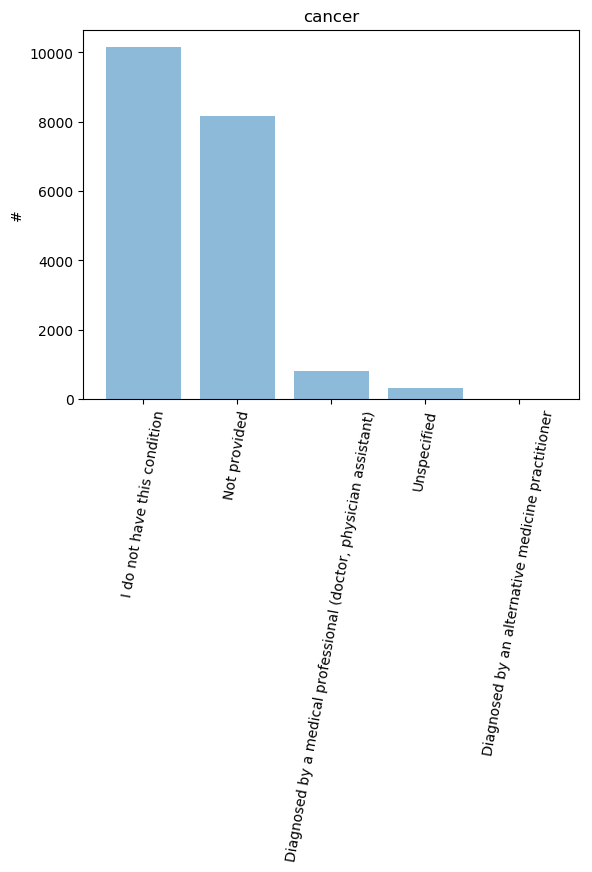

In [45]:
#Plotting individual counts
import matplotlib.pyplot as plt; plt.rcdefaults()
colName='cancer'
objects=list(allColCountsBad[colName].keys())

y_pos = np.arange(len(objects))
performance = list(allColCountsBad[colName].values())
fig = plt.figure()
ax = fig.add_subplot(111)
ax.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
ax.set_ylabel('#')
ax.set_xticklabels( objects, rotation=80 )
plt.title(colName)

plt.show()

In [68]:
def split_list(alist, wanted_parts=1):
    length = len(alist)
    return [ alist[i*length // wanted_parts: (i+1)*length // wanted_parts] 
             for i in range(wanted_parts) ]
#multiBarsListCols=split_list(list(newSumDF.keys()), 10)
multiBarsListCols=split_list(newSumDF, 20)
multiBarsListCols

[sample_name                                                0
 acid_reflux                                             8488
 acne_medication                                          664
 acne_medication_otc                                      698
 add_adhd                                                4488
 age_cat                                                 1363
 age_corrected                                           1374
 age_years                                                807
 alcohol_consumption                                      514
 alcohol_frequency                                        514
 alcohol_types                                          19439
 alcohol_types_beercider                                    5
 alcohol_types_red_wine                                     5
 alcohol_types_sour_beers                                   5
 alcohol_types_spiritshard_alcohol                          5
 alcohol_types_unspecified                                  5
 alcohol

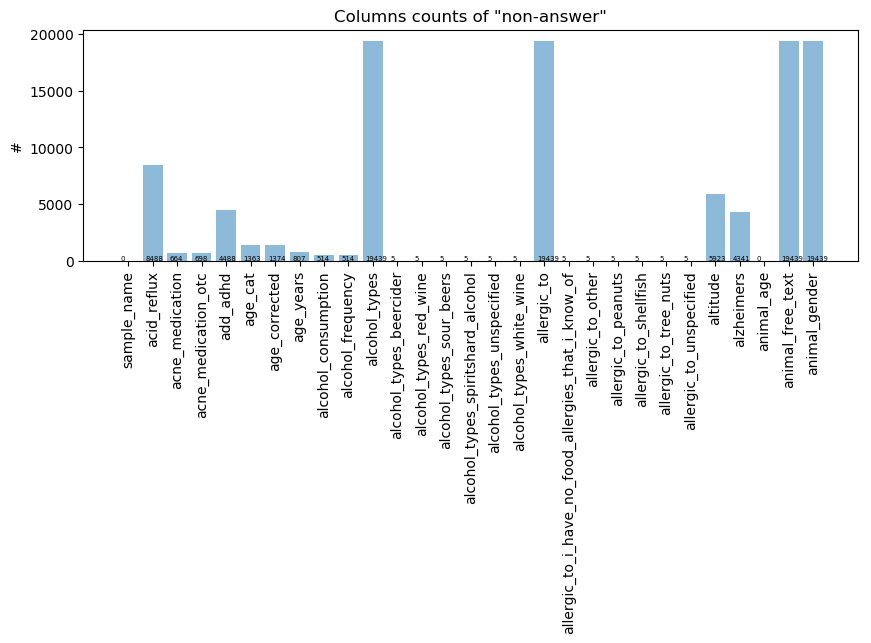

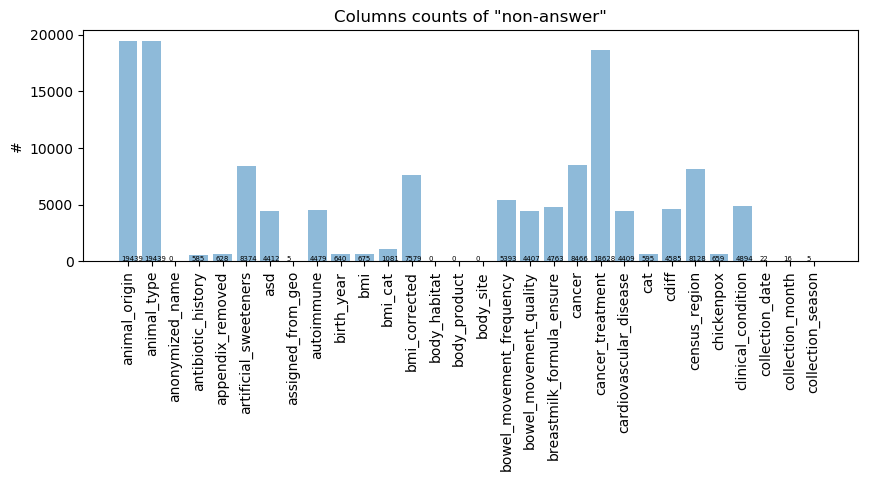

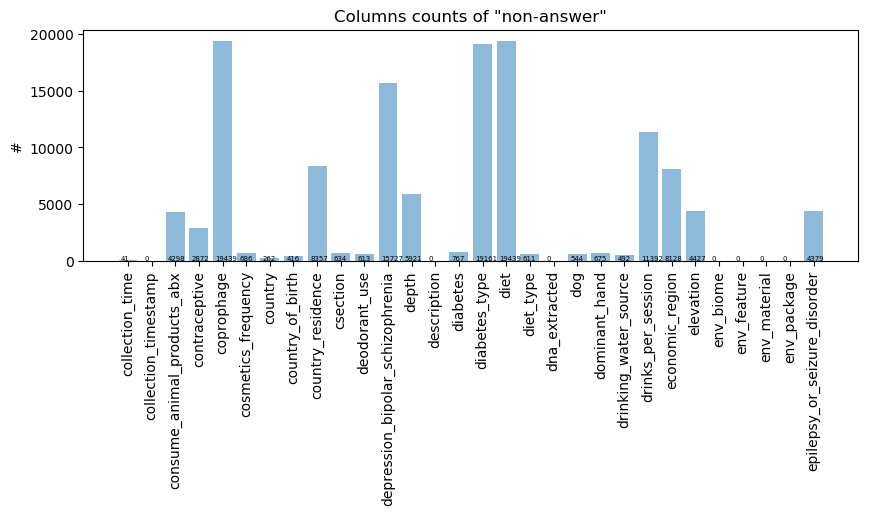

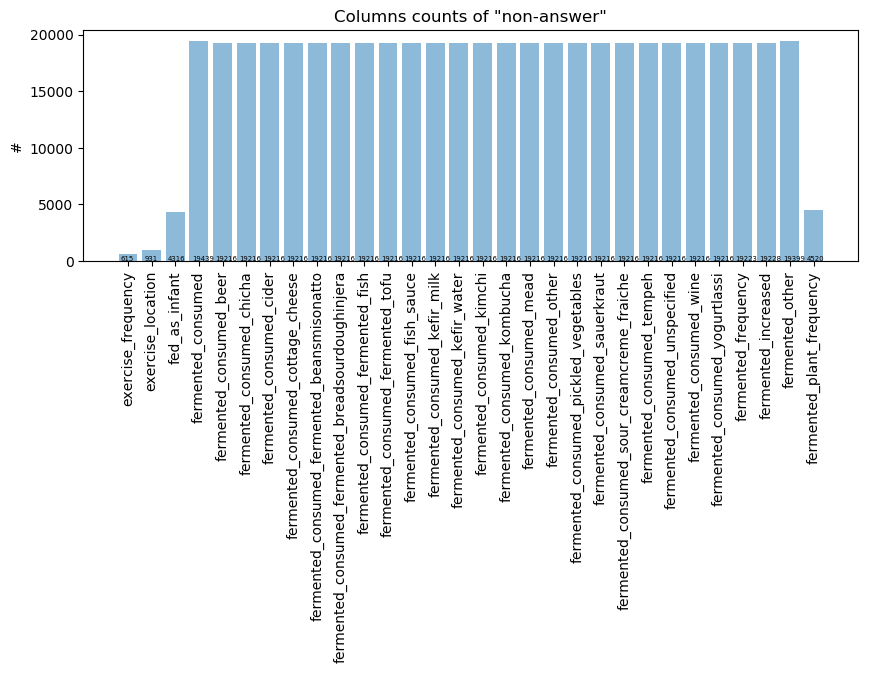

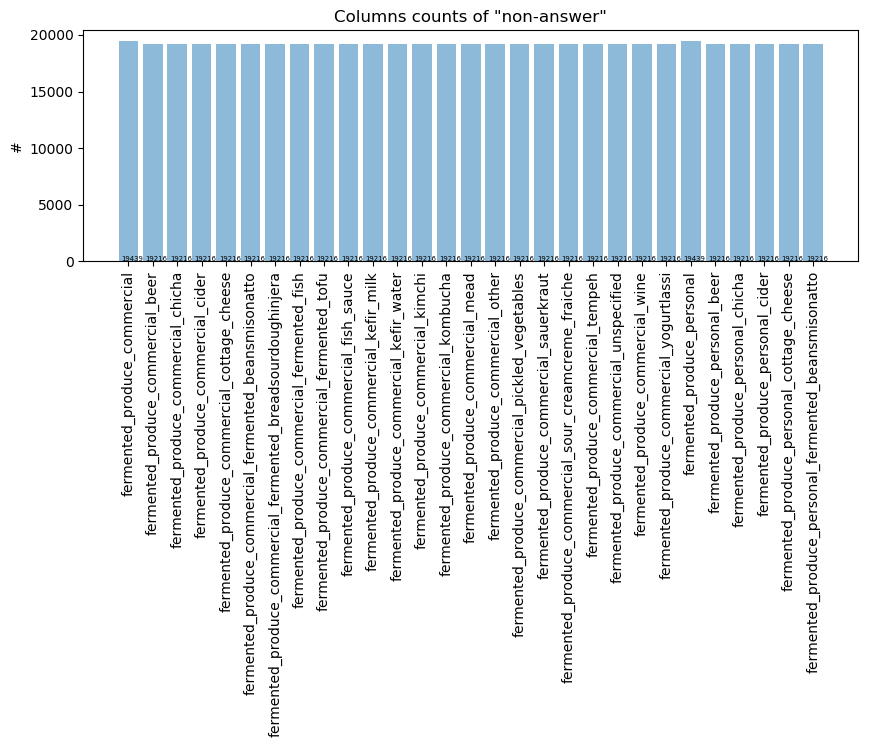

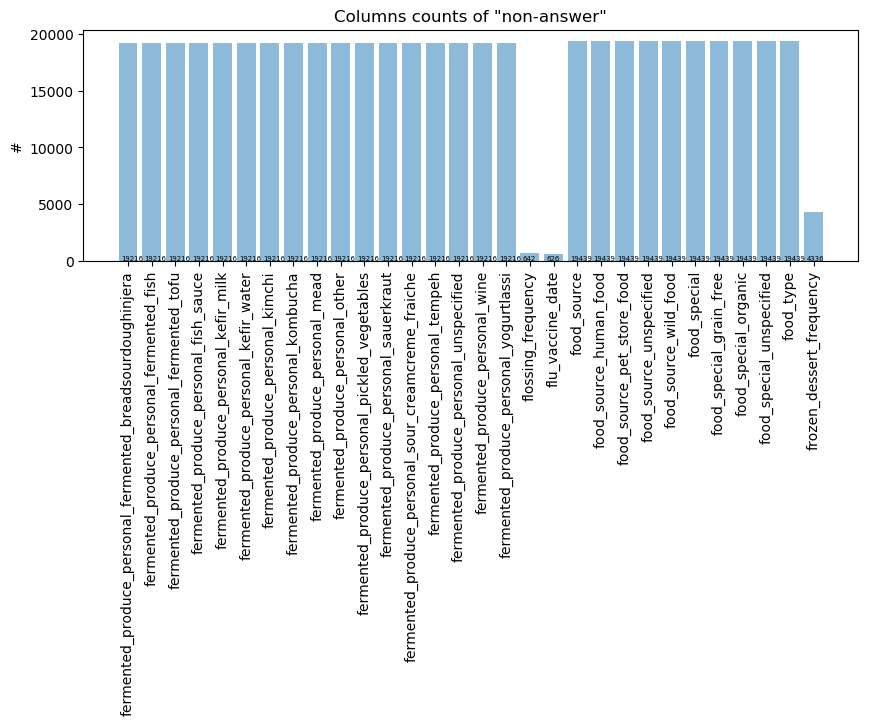

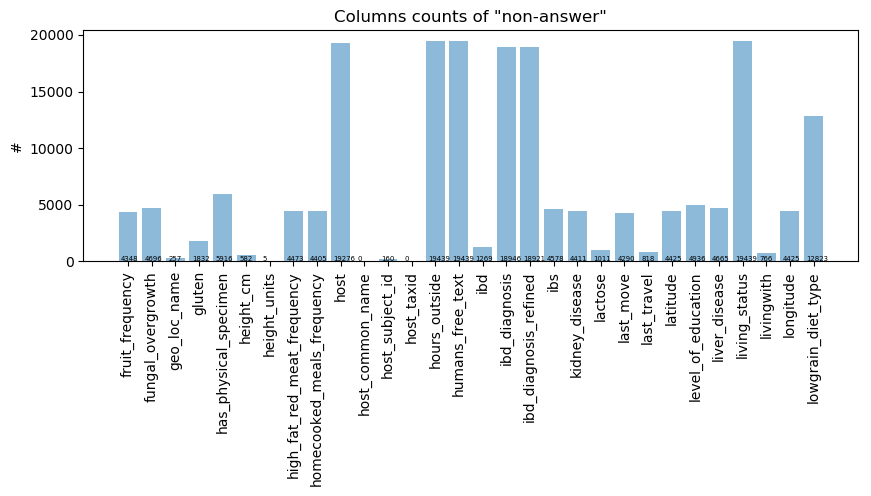

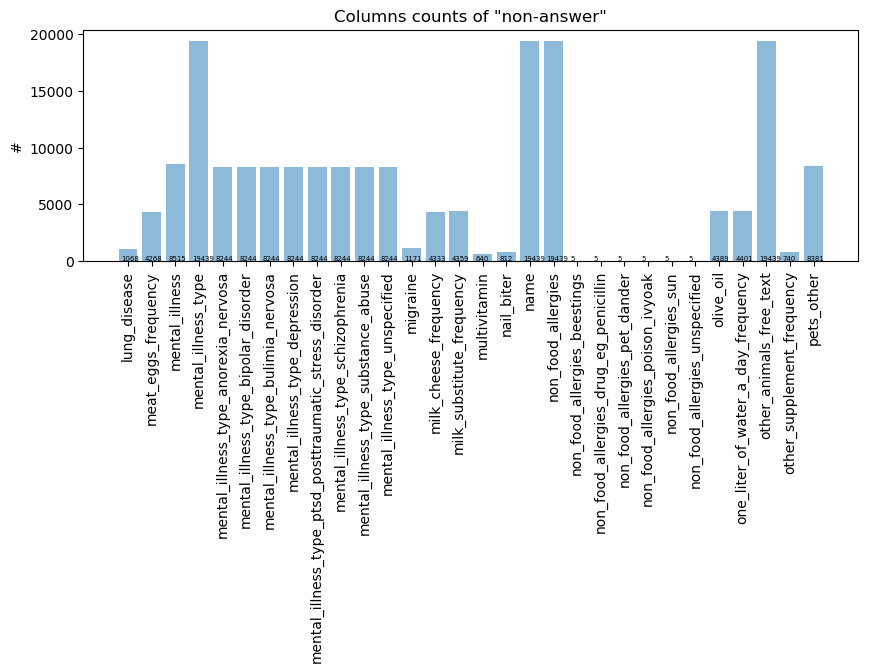

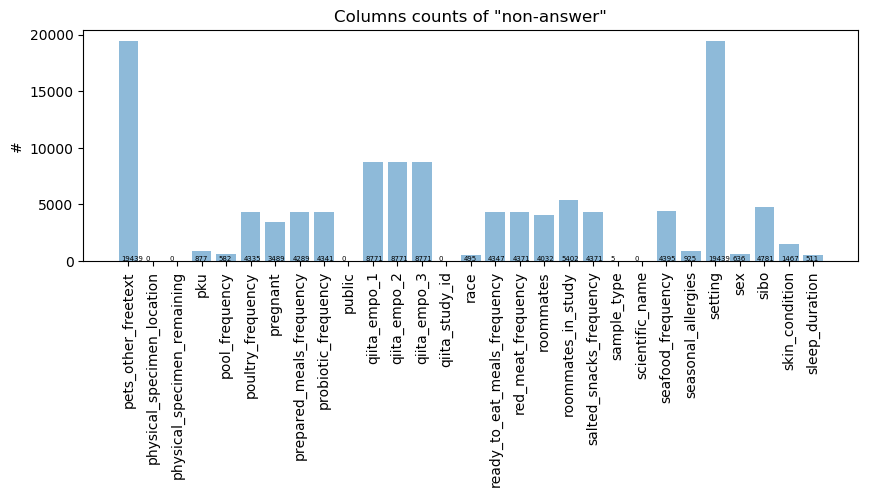

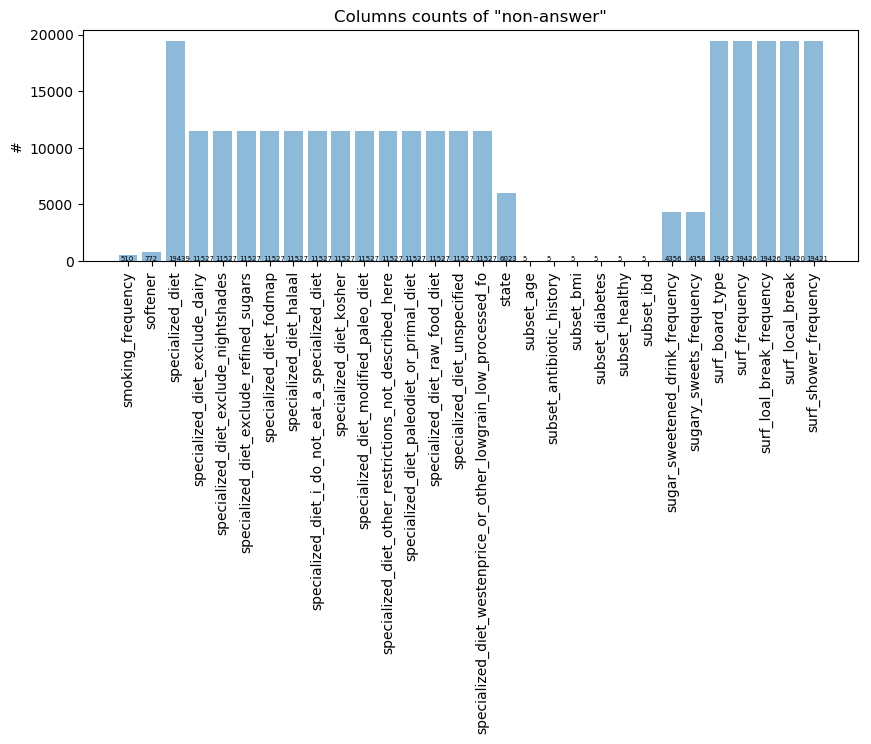

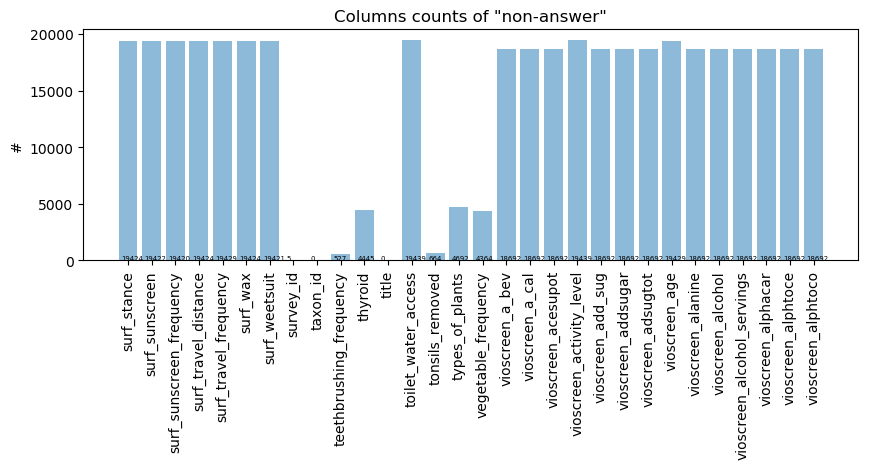

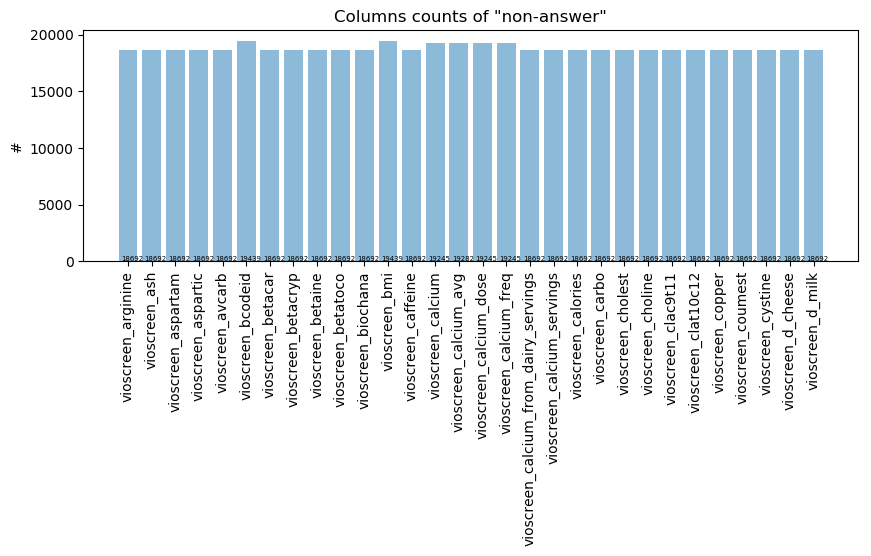

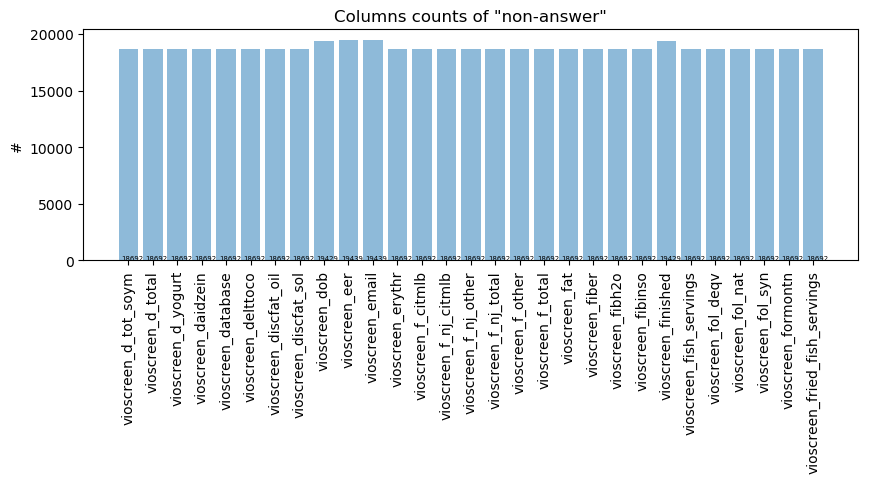

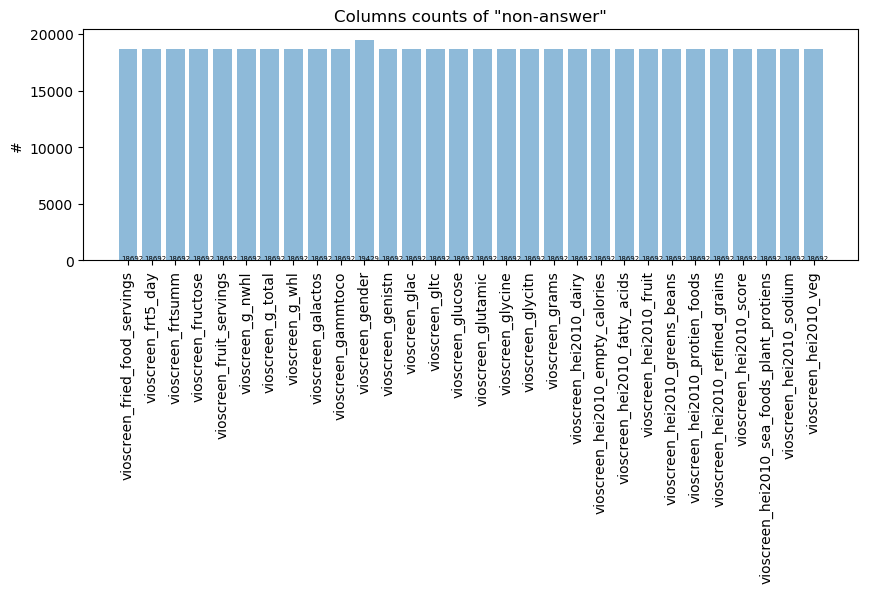

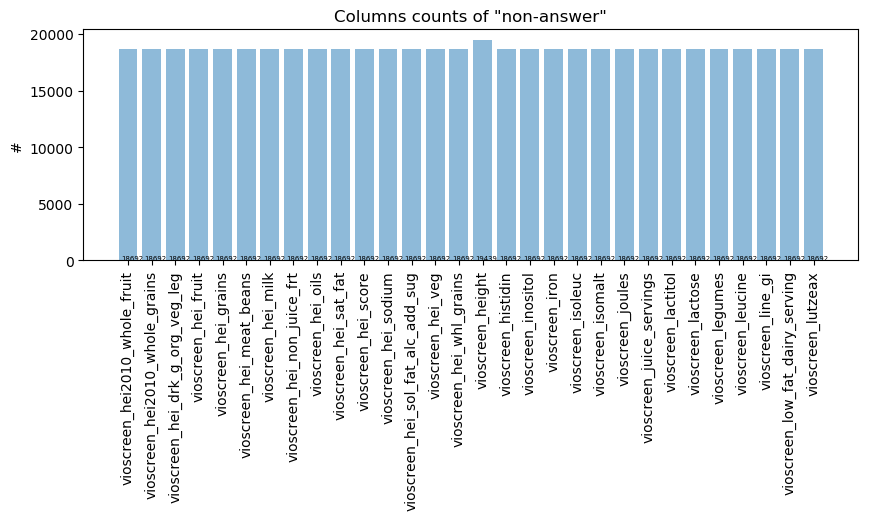

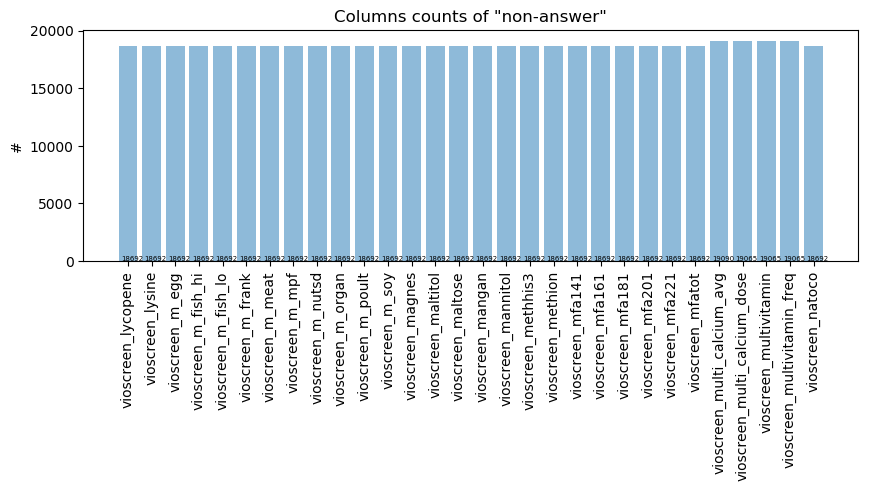

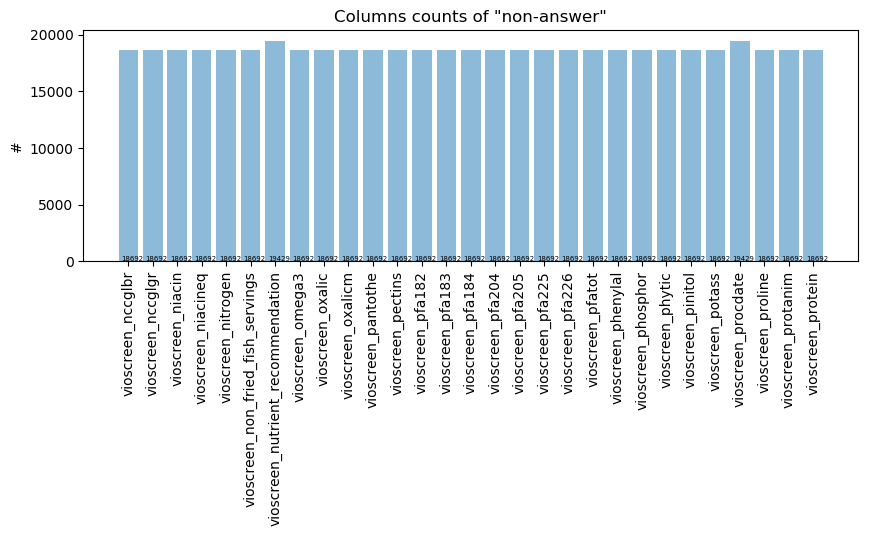

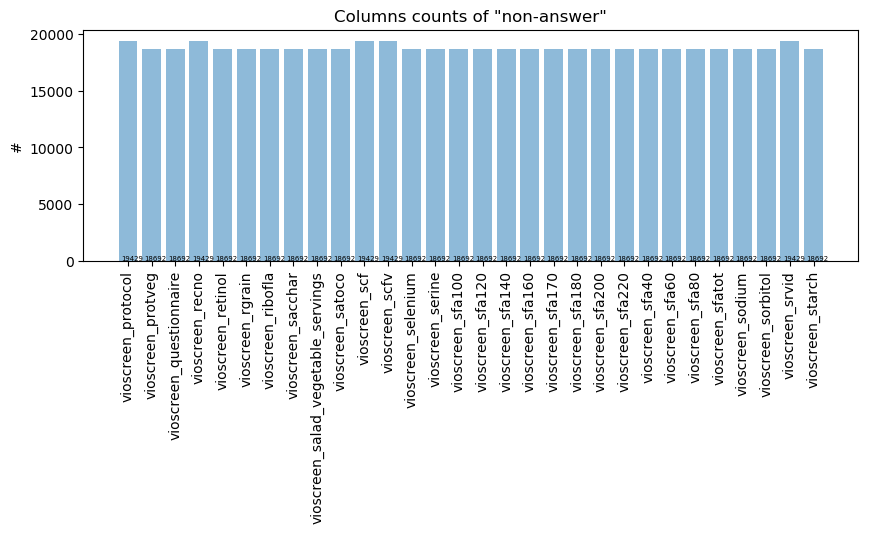

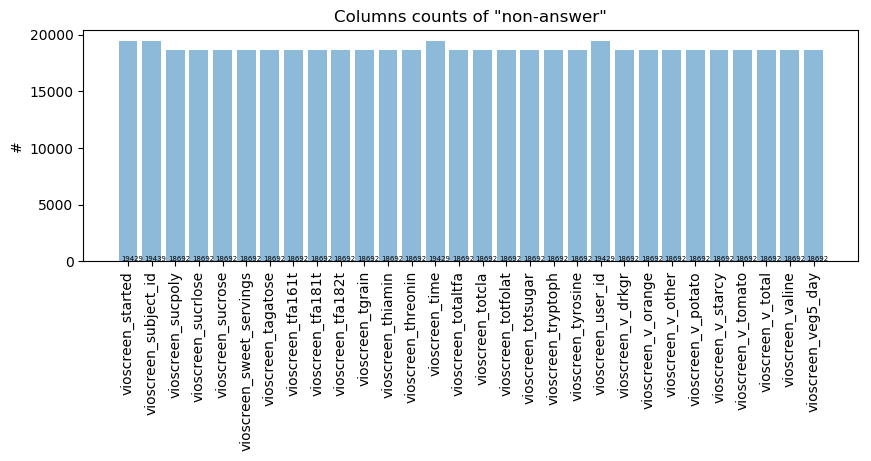

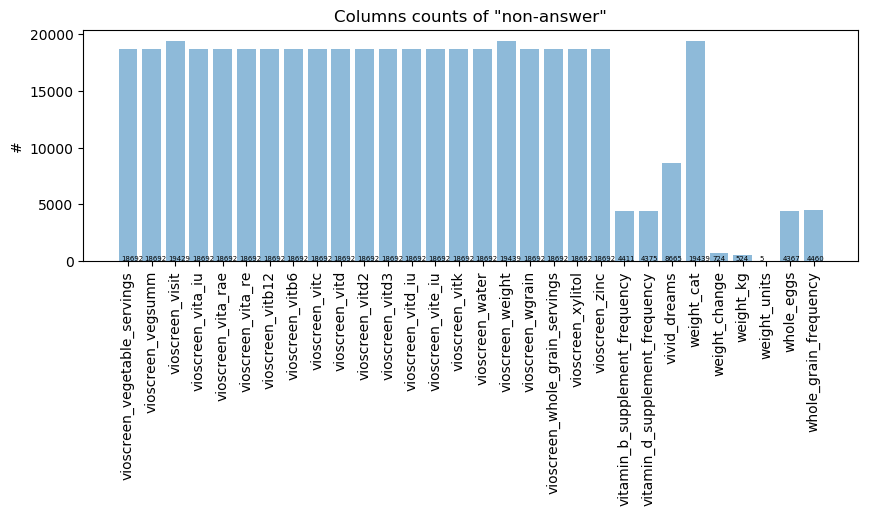

In [93]:
for cols in multiBarsListCols:
    objects=list(cols.keys())

    y_pos = np.arange(len(objects))
    performance = cols.values
    fig = plt.figure(figsize=(10,3))
    ax = fig.add_subplot(111)
    ax.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    ax.set_ylabel('#')
    ax.set_xticklabels( objects, rotation=90 )
    for i, v in enumerate(performance):
        ax.text(i-.3, 
              v/(1 if performance[i] == 0 else performance[i]), 
              performance[i], 
              fontsize=5)
    plt.title('Columns counts of "non-answer"')

    plt.show()

In [32]:
#Lets look into the host_subject_id to see how many people took multiple samples and how many
#uniqueHosts=pd.DataFrame(dietDF['host_subject_id'].value_counts())
#singletonHostSubs=uniqueHosts.loc[uniqueHosts['host_subject_id'] == 1]
#singletonHostSubs
dietDF['host_subject_id'].unique()

array(['30de6efc54cd37cdfc5980b23726d3d5cc11a1d333f1ad1839c413d182e3d2e30307b560a3f314bce096a7f08eb48d20581a30eb6f7ab4fa7c7f2c745fac82f7',
       'd212da7fd7d7d16df1954534222cc5422868f35755406fc64a6bd01cf03c8d5bafcd1734ba70d78a21b45592a1adcc40ffe7fcfc4bc48f6da5cb46d4b21a3144',
       '7a1742c847e1b731ed351c6cb18fddfe1ab0db81516394f2e57f977ad55ce68d2099284489c1751114e31741276e2d7ca5d5706ede614a12225be9a9e568521f',
       ...,
       'cc73594f57ea3f1df1315e213afebb7f8e27c61a7470c0fec1fdc41b6a19ade76bc574505fa3e3d21ee335079ffdd63d7f16213808c211ab176893d737a9fdeb',
       '51ef7e6920c7894dadc01d883038f30234871c33f9888c41d87fc0bb6215161b9877a53b31e803db55b77973bf9c1edfd2ac7ff5c44a950601879773dee3e173',
       '3c25a38841b10153729a10697f705963b73e30a209a9e3246f3b997debfa587b5eee432007216d1272e3d27d634dda7bebf554d8034abaaa9619c454e6e7c134'],
      dtype=object)

In [ ]:
#See here for correlation matrices
#We want to get things that are correllated
#https://datascience.stackexchange.com/questions/10459/calculation-and-visualization-of-correlation-matrix-with-pandas